In [2]:
!wget http://mng.bz/0tIo --no-check-certificate

--2022-07-19 12:45:36--  http://mng.bz/0tIo
Resolving mng.bz (mng.bz)... 35.166.24.88
Connecting to mng.bz (mng.bz)|35.166.24.88|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://mng.bz/0tIo [following]
--2022-07-19 12:45:36--  https://mng.bz/0tIo
Connecting to mng.bz (mng.bz)|35.166.24.88|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 301 
Location: http://s3.amazonaws.com/text-datasets/aclImdb.zip [following]
--2022-07-19 12:45:37--  http://s3.amazonaws.com/text-datasets/aclImdb.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.128.88
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.128.88|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60711700 (58M) [application/zip]
Saving to: ‘0tIo’

0tIo                100%[===================>]  57.90M  15.3MB/s    in 5.0s    

2022-07-19 12:45:42 (11.6 MB/s) - ‘0tIo’ saved [60711700/60711700]

In [7]:
!unzip new.zip

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/aclImdb/train/pos/._7754_9.txt  
  inflating: aclImdb/train/pos/7755_9.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7755_9.txt  
  inflating: aclImdb/train/pos/7756_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7756_10.txt  
  inflating: aclImdb/train/pos/7757_9.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7757_9.txt  
  inflating: aclImdb/train/pos/7758_7.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7758_7.txt  
  inflating: aclImdb/train/pos/7759_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7759_10.txt  
  inflating: aclImdb/train/pos/775_7.txt  
  inflating: __MACOSX/aclImdb/train/pos/._775_7.txt  
  inflating: aclImdb/train/pos/7760_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7760_10.txt  
  inflating: aclImdb/train/pos/7761_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7761_10.txt  
  inflating: aclImdb/train/pos/7762_8.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7762_8.txt

In [8]:
import os

In [12]:
current = os.getcwd()

In [13]:
data_dir = os.path.join(current,'IMDB_data')

In [14]:
train_dir = os.path.join(data_dir,'train')

In [15]:
labels = []
text = []

In [16]:
for label_type in ['neg','pos']:
  dir_name = os.path.join(train_dir,label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:]=='.txt':
      f = open(os.path.join(dir_name,fname))
      text.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)
        

In [18]:
len(text)

25000

In [19]:
text[0]

'or: It\'s a bird ? It\'s a plane ? No, look... It\'s a disaster ! or: No need to look up in the sky.<br /><br />or: (... OK, that\'s enough.) If singer tried to make a romantic titanic like movie to crash the box office record, he failed. The SR structure can\'t do this, the dark and restricted color scheme (I would call it "wishi-washi"), the boring usual dialogs, the clown with advanced alien technology, the missing fun and magic, etc. makes the movie completely disappointing.<br /><br />It simply doesn\'t work.<br /><br />The main thing at a character like superman is, that he is a superhero. That\'s the core, the most important thing.<br /><br />Love trouble and a sadly lost depressive Supersoftie can maximal only be a facet in a 2:40 long Superman movie, not the whole time.<br /><br />Because then it is not a superman or superhero movie anymore. It\'s like a (and in this case a very bad and boring) social study, where every 30 minutes a person flies around.<br /><br />That\'s a b

In [26]:
labels[12]

0

In [28]:
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [29]:
maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

In [31]:
tokeniser = Tokenizer(num_words = max_words)
tokeniser.fit_on_texts(text)

In [32]:
sequence = tokeniser.texts_to_sequences(text)

In [33]:
word_index = tokeniser.word_index

In [34]:
print(len(word_index))

88582


In [35]:
data = pad_sequences(sequence,maxlen)

In [37]:
import numpy as np
labels = np.asarray(labels)

In [38]:
print(data.shape)
print(labels.shape)

(25000, 100)
(25000,)


In [39]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)

In [40]:
data = data[indices]
labels = labels[indices]

In [73]:
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples:validation_samples]
y_val = labels[training_samples:validation_samples]

In [72]:
y_val.shape

(9800, 100)

In [42]:
#Downlaoding the GLove Embeddings

In [54]:
!wget  https://nlp.stanford.edu/data/glove.twitter.27B.zip --no-check-certificate

--2022-07-19 13:12:14--  https://nlp.stanford.edu/data/glove.twitter.27B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip [following]
--2022-07-19 13:12:15--  https://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1520408563 (1.4G) [application/zip]
Saving to: ‘glove.twitter.27B.zip’

glove.twitter.27B.z 100%[===================>]   1.42G  5.01MB/s    in 4m 45s  

2022-07-19 13:17:01 (5.09 MB/s) - ‘glove.twitter.27B.zip’ saved [1520408563/1520408563]



In [55]:
#Preprocessing the Embeddings
!unzip glove.twitter.27B.zip

Archive:  glove.twitter.27B.zip
  inflating: glove.twitter.27B.25d.txt  
  inflating: glove.twitter.27B.50d.txt  
  inflating: glove.twitter.27B.100d.txt  
  inflating: glove.twitter.27B.200d.txt  


In [45]:
glove_dir = os.path.join(current,'glove')

In [46]:
embedding_index = {}

In [57]:
f = open('glove.twitter.27B.100d.txt')
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:],dtype = 'float32')
  embedding_index[word] = coefs
f.close()

In [58]:
print(len(embedding_index))
 

1193514


In [59]:
#Build embedding matrix which can be loaded into Embedding Lyer

In [60]:
#Shape : max_words,embedding_dim  

In [63]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words,embedding_dim))
for word, i in word_index.items():
  if i <max_words:
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i]=embedding_vector

In [65]:
#Defining a model
from tensorflow.keras.layers import Dense,Flatten,Embedding
from tensorflow.keras.models import Sequential

In [66]:
network = Sequential([
                      Embedding(max_words,embedding_dim,input_length = maxlen),
                      Flatten(),
                      Dense(units = 32, activation = 'relu'),
                      Dense(units = 1,activation = 'sigmoid')

])

In [67]:
#loading weights into the Embedding Layer

In [69]:
network.layers[0].set_weights([embedding_matrix])
network.layers[0].trainable = False

In [74]:
network.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = network.fit(x_train, y_train,
epochs=10,
batch_size=32,
validation_data=(x_val, y_val))
network.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 2s 138ms/step - loss: 1.0757 - acc: 0.5200 - val_loss: 0.6942 - val_acc: 0.5193
Epoch 2/10
7/7 [==============================] - 1s 106ms/step - loss: 0.4103 - acc: 0.8500 - val_loss: 0.9796 - val_acc: 0.5017
Epoch 3/10
7/7 [==============================] - 1s 113ms/step - loss: 0.2611 - acc: 0.9200 - val_loss: 0.9005 - val_acc: 0.5097
Epoch 4/10
7/7 [==============================] - 1s 113ms/step - loss: 0.1247 - acc: 0.9800 - val_loss: 0.7120 - val_acc: 0.5792
Epoch 5/10
7/7 [==============================] - 1s 111ms/step - loss: 0.0502 - acc: 1.0000 - val_loss: 0.7142 - val_acc: 0.5892
Epoch 6/10
7/7 [==============================] - 1s 108ms/step - loss: 0.0196 - acc: 1.0000 - val_loss: 0.7549 - val_acc: 0.5870
Epoch 7/10
7/7 [==============================] - 1s 113ms/step - loss: 0.0117 - acc: 1.0000 - val_loss: 0.7788 - val_acc: 0.5794
Epoch 8/10
7/7 [==============================] - 1s 113ms/step - loss: 0.0071 - acc: 1.00

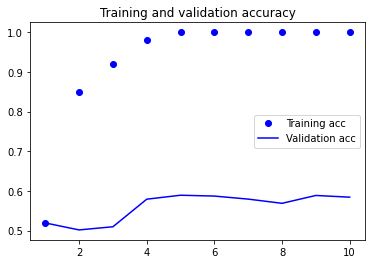

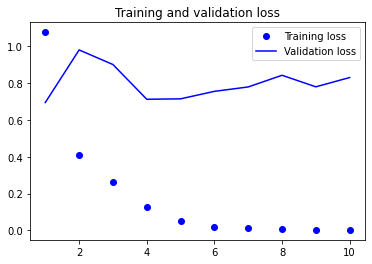

In [75]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [76]:
#Without Pre trained Weights

In [77]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(x_train, y_train,
epochs=10,
batch_size=32,
validation_data=(x_val, y_val))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_2 (Dense)             (None, 32)                320032    
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 2s 142ms/step - loss: 0.6967 - acc: 0.4650 - val_loss: 0.6921 - val_acc: 0.5211
Epoch 2/10
7/7 [==============================

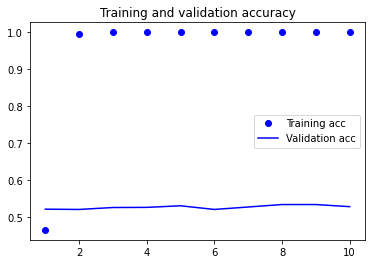

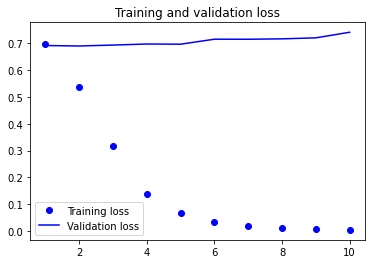

In [78]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()